In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
data = pd.read_csv("metaverse_transactions_dataset.csv")

In [3]:
print("----------Displaying some rows of data----------\n\n", data.head())
print("\n\n----------Displaying column names of data----------\n\n", data.columns)
print("\n\n----------Displaying statistical summary of data----------\n\n", data.describe())
print("\n\n----------Displaying shape of data----------\n", data.shape)


----------Displaying some rows of data----------

              timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b

## Understanding the data

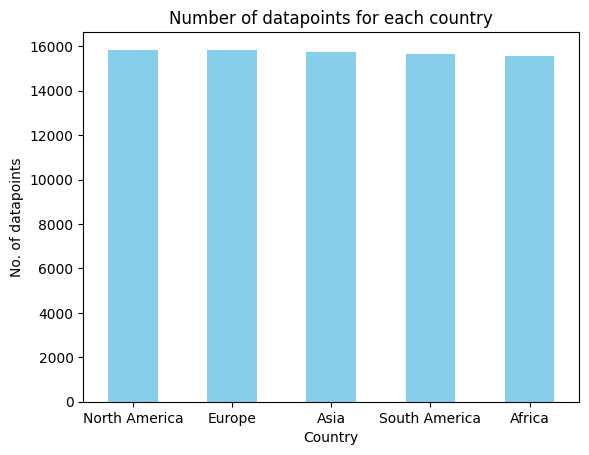

In [4]:
continent_counts = data['location_region'].value_counts()

#plotting the data
continent_counts.plot(kind='bar', color='skyblue')
plt.title("Number of datapoints for each country")
plt.xlabel("Country")
plt.ylabel("No. of datapoints")
plt.xticks(rotation=0)
plt.show()


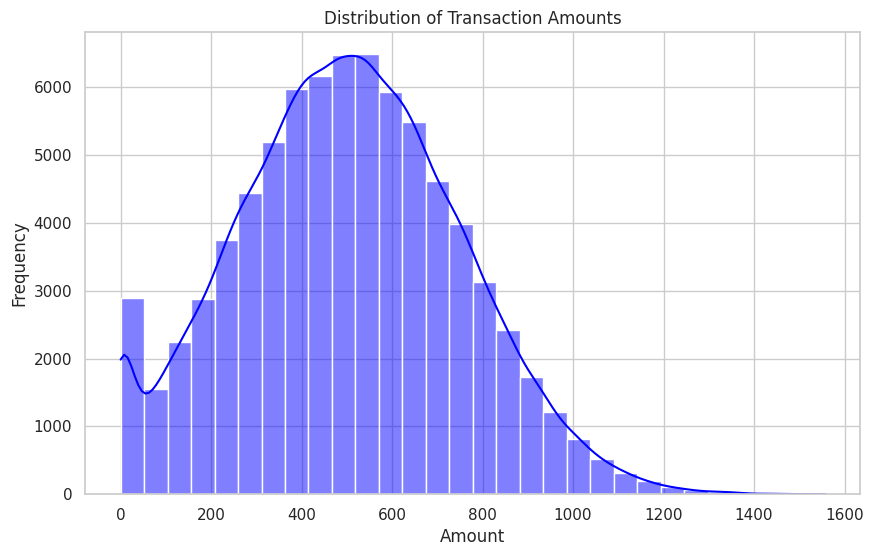

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of the Amount column
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Data cleaning

In [6]:
# removing columns that are not needed
columns_to_remove = ['age_group', 'purchase_pattern', 'timestamp', 'hour_of_day', 'sending_address', 'receiving_address', 'transaction_type', 'ip_prefix', 'login_frequency', 'session_duration']

# Drop the columns
data = data.drop(columns=columns_to_remove)

In [7]:
data

,amount,location_region,risk_score,anomaly
0,796.949206,Europe,18.7500,low_risk
1,0.010000,South America,25.0000,low_risk
2,778.197390,Asia,31.2500,low_risk
3,300.838358,South America,36.7500,low_risk
4,775.569344,Africa,62.5000,moderate_risk
...,...,...,...,...
78595,660.280373,Africa,26.2500,low_risk
78596,310.273397,Africa,26.2500,low_risk
78597,624.674332,Africa,36.7500,low_risk
78598,401.391592,Asia,35.4375,low_risk


# data Augmentation

       amount location_region        anomaly       payment_option
0  796.949206          Europe       low_risk                 SEPA
1    0.010000   South America       low_risk  Blockchain Transfer
2  778.197390            Asia       low_risk  Blockchain Transfer
3  300.838358   South America       low_risk  Blockchain Transfer
4  775.569344          Africa  moderate_risk  Blockchain Transfer


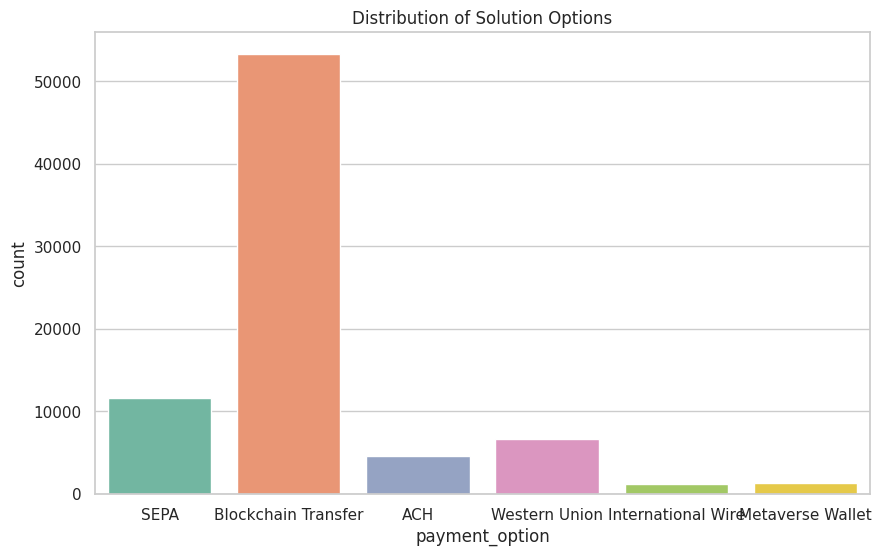

In [8]:
import pandas as pd

# Function to determine the solution option based on Amount, Location Region, and Anomaly
def determine_solution_option(row):
    if row['amount'] < 400 and row['location_region'] == 'North America' and row['anomaly'] == 'low_risk':
        return 'ACH'
    elif row['amount'] < 800 and row['location_region'] == 'Europe' and row['anomaly'] == 'low_risk':
        return 'SEPA'
    elif row['amount'] < 500 and row['location_region'] == 'Asia' and row['anomaly'] == 'low_risk':
        return 'Western Union'
    elif row['amount'] >= 500 and row['location_region'] in ['South America'] and row['anomaly'] == 'moderate_risk':
        return 'International Wire'
    elif row['location_region'] == 'Asia' and row['anomaly'] == 'high_risk':
        return 'Metaverse Wallet'
    else:
        return 'Blockchain Transfer'

# Apply the function to create the new feature
data['payment_option'] = data.apply(determine_solution_option, axis=1)

# Display the first few rows of the augmented dataset
print(data[['amount', 'location_region', 'anomaly', 'payment_option']].head())

# Visualize the distribution of the Solution Option
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='payment_option', data=data, palette='Set2')
plt.title('Distribution of Solution Options')
plt.show()


In [9]:
# to get the generation time 
def generate_transaction_time(option):
    if option == 'ACH':
        return np.random.randint(1440, 4320)  # 1-3 days in minutes
    elif option == 'SEPA':
        return np.random.randint(60, 1440)    # 1 hour to 1 day
    elif option == 'Western Union':
        return np.random.randint(10, 2880)    # Minutes to 2 days
    elif option == 'International Wire':
        return np.random.randint(2880, 7200) # 2-5 days
    elif option == 'Metaverse Wallet':
        return np.random.randint(1, 60)       # Instantly or within an hour
    elif option == 'Blockchain Transfer':
        return np.random.randint(10, 1440)    # Minutes to 1 day
    else:
        return np.nan

data['transaction_time'] = data['payment_option'].apply(generate_transaction_time)



# Assigning Transaction Fee based on Solution Option
transaction_fees = {
    'ACH': np.random.uniform(0.1, 1),      # Low fee
    'SEPA': np.random.uniform(0.5, 5),     # Low to moderate fee
    'Western Union': np.random.uniform(5, 20),  # Higher fee
    'International Wire': np.random.uniform(15, 50),  # High fee
    'Metaverse Wallet': np.random.uniform(0, 2),  # Minimal fee
    'Blockchain Transfer': np.random.uniform(1, 10)  # Variable fee
}
data['transaction_fee'] = data['payment_option'].map(transaction_fees) * (data['amount'] / 10000)


In [10]:
data[:15]

,amount,location_region,risk_score,anomaly,payment_option,transaction_time,transaction_fee
0,796.949206,Europe,18.75,low_risk,SEPA,1239,0.342218
1,0.010000,South America,25.00,low_risk,Blockchain Transfer,1428,0.000004
2,778.197390,Asia,31.25,low_risk,Blockchain Transfer,863,0.319101
3,300.838358,South America,36.75,low_risk,Blockchain Transfer,630,0.123359
4,775.569344,Africa,62.50,moderate_risk,Blockchain Transfer,263,0.318023
5,590.253982,Africa,15.75,low_risk,Blockchain Transfer,1060,0.242034
6,671.496246,South America,52.50,low_risk,Blockchain Transfer,287,0.275348
7,800.208934,South America,50.00,low_risk,Blockchain Transfer,396,0.328127
8,218.030944,South America,15.00,low_risk,Blockchain Transfer,1335,0.089404
9,134.595378,Europe,15.00,low_risk,SEPA,1379,0.057797


In [11]:
print(data['transaction_time'].describe())

count    78600.000000
mean       969.857392
std        899.111893
min          1.000000
25%        401.000000
50%        813.000000
75%       1221.000000
max       7172.000000
Name: transaction_time, dtype: float64


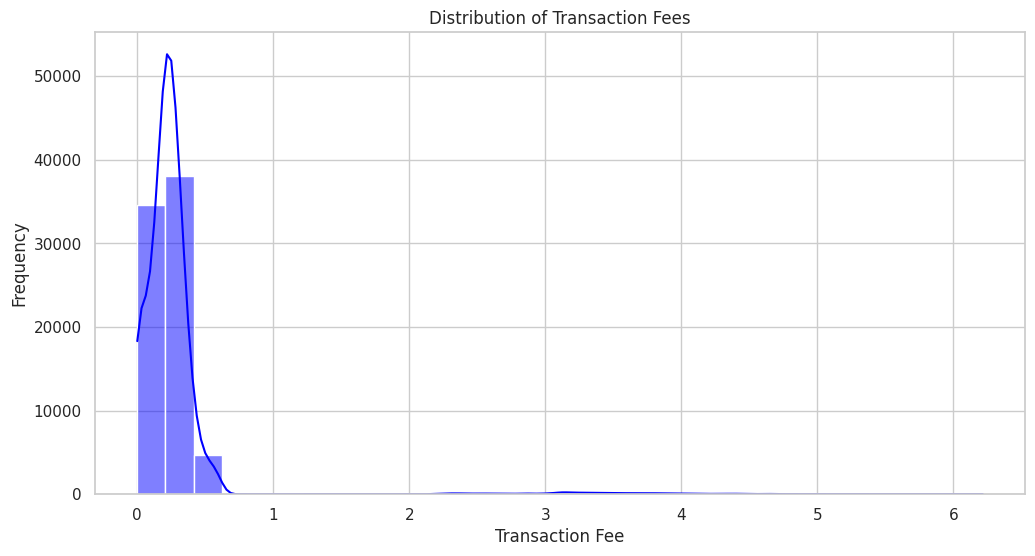

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Transaction Fees
plt.figure(figsize=(12, 6))
sns.histplot(data['transaction_fee'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Fees')
plt.xlabel('Transaction Fee')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


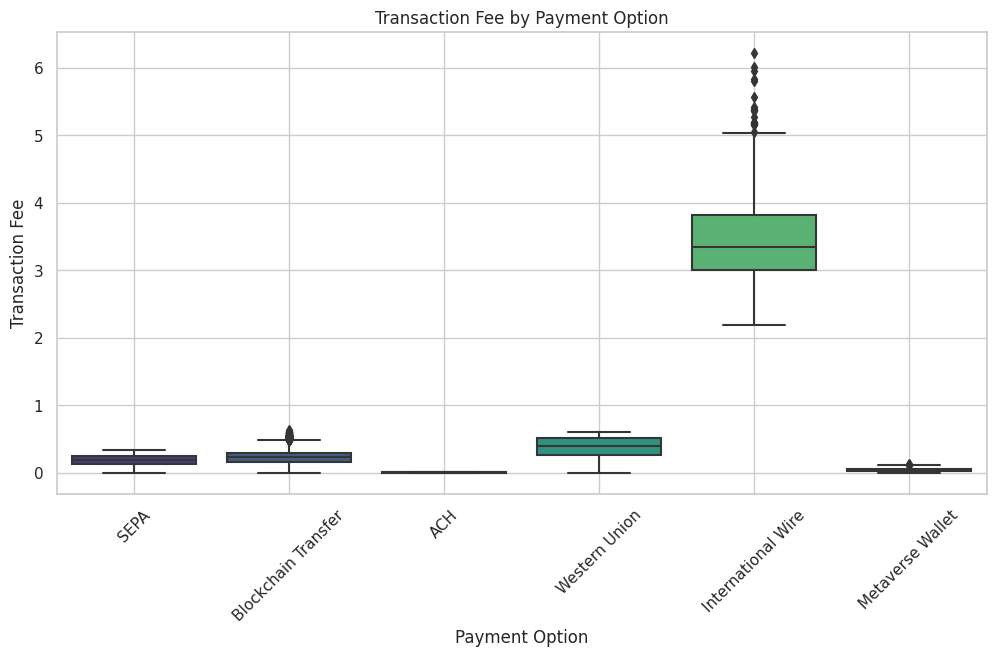

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='payment_option', y='transaction_fee', palette='viridis')
plt.title('Transaction Fee by Payment Option')
plt.xlabel('Payment Option')
plt.ylabel('Transaction Fee')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


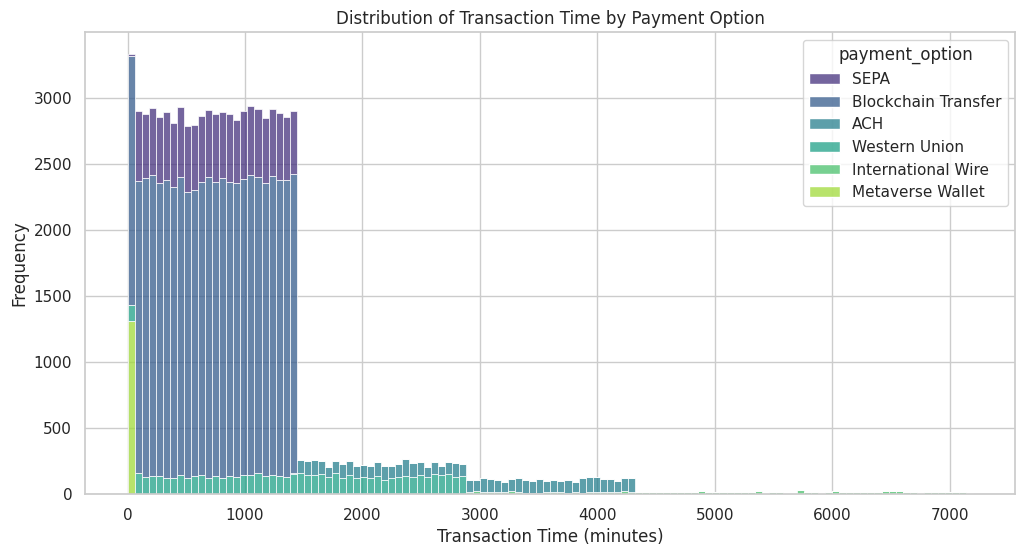

In [14]:
# Histogram of Transaction Time with Payment Option as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='transaction_time', hue='payment_option', multiple='stack', palette='viridis', binwidth=60)
plt.title('Distribution of Transaction Time by Payment Option')
plt.xlabel('Transaction Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

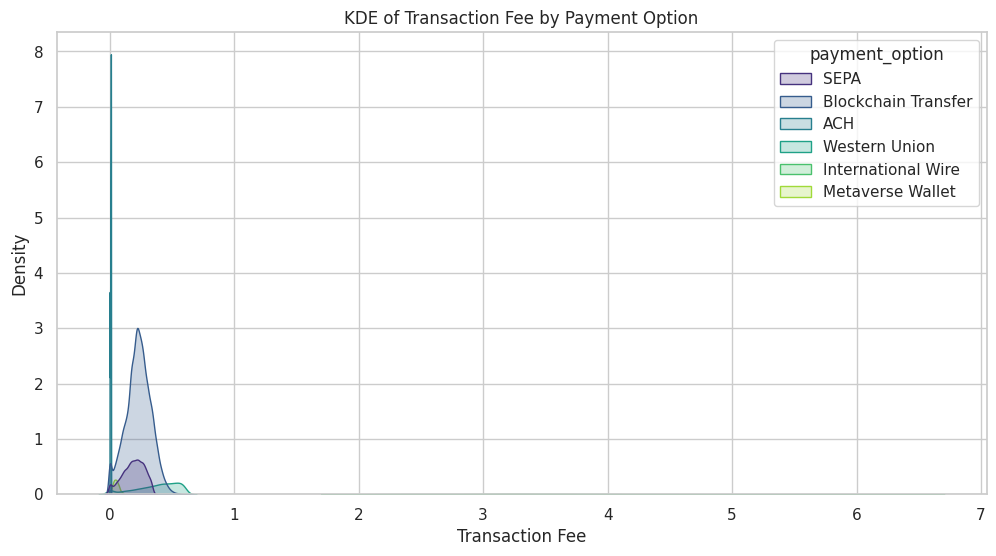

In [15]:
# KDE plot of Transaction Fee with Payment Option as hue
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='transaction_fee', hue='payment_option', fill=True, palette='viridis')
plt.title('KDE of Transaction Fee by Payment Option')
plt.xlabel('Transaction Fee')
plt.ylabel('Density')
plt.grid(True)
plt.show()

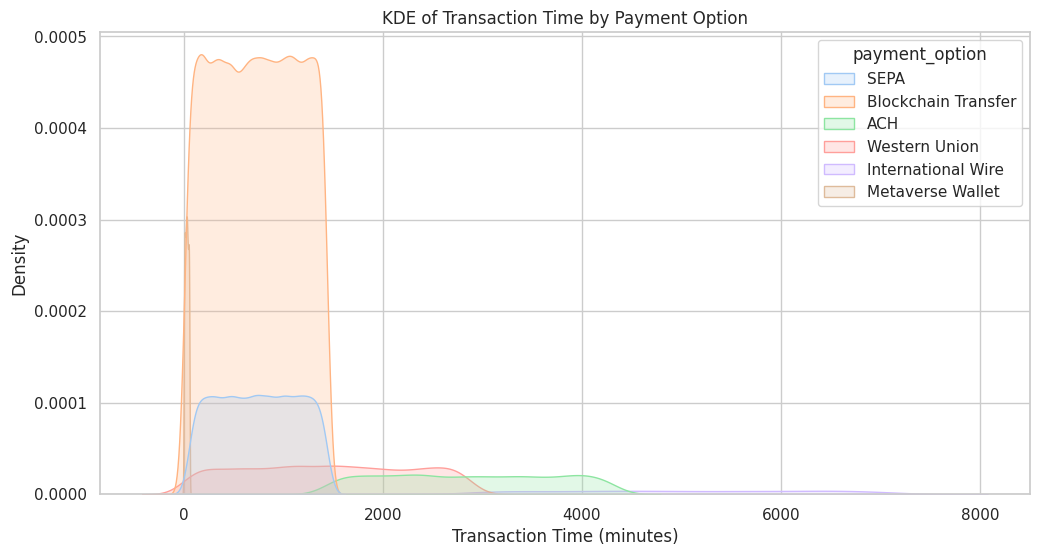

In [16]:
# KDE plot of Transaction Time with Payment Option as hue
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='transaction_time', hue='payment_option', fill=True, palette='pastel')
plt.title('KDE of Transaction Time by Payment Option')
plt.xlabel('Transaction Time (minutes)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [17]:
data.head()

,amount,location_region,risk_score,anomaly,payment_option,transaction_time,transaction_fee
0,796.949206,Europe,18.75,low_risk,SEPA,1239,0.342218
1,0.010000,South America,25.00,low_risk,Blockchain Transfer,1428,0.000004
2,778.197390,Asia,31.25,low_risk,Blockchain Transfer,863,0.319101
3,300.838358,South America,36.75,low_risk,Blockchain Transfer,630,0.123359
4,775.569344,Africa,62.50,moderate_risk,Blockchain Transfer,263,0.318023


In [18]:
columns_to_remove = ['anomaly']

# Drop the columns
data = data.drop(columns=columns_to_remove)

In [19]:
data['payment_option'].value_counts()

Blockchain Transfer    53300
SEPA                   11570
Western Union           6607
ACH                     4594
Metaverse Wallet        1312
International Wire      1217
Name: payment_option, dtype: int64

## Model Training 

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'importlib_metadata'

In [28]:
# Retrieve the mapping of numeric codes back to categorical values
location_region_mapping = dict(enumerate(data['location_region'].astype('category').cat.categories))
payment_option_mapping = dict(enumerate(data['payment_option'].astype('category').cat.categories))


# Convert categorical features to numeric codes
data['location_region'] = data['location_region'].astype('category').cat.codes
data['payment_option'] = data['payment_option'].astype('category').cat.codes

# Display the mapping dictionaries
print("Location Region Mapping:", location_region_mapping)
print("Payment Option Mapping:", payment_option_mapping)

Location Region Mapping: {0: 'Africa', 1: 'Asia', 2: 'Europe', 3: 'North America', 4: 'South America'}
Payment Option Mapping: {0: 'ACH', 1: 'Blockchain Transfer', 2: 'International Wire', 3: 'Metaverse Wallet', 4: 'SEPA', 5: 'Western Union'}


In [29]:
import json
with open("location_dict.json", "w") as outfile:
    json.dump(location_region_mapping, outfile)

with open("payment_dict.json", "w") as outfile:
    json.dump(payment_option_mapping, outfile)


In [30]:
# Features and target
X = data[['location_region', 'amount', 'risk_score', 'transaction_time', 'transaction_fee']]
y = data['payment_option']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [31]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=23)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9260337150127226


In [32]:
# Save the trained model to a .pkl file
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


Confusion Matrix:
 [[  938     0     0     0     0     0]
 [    0 10321     0     0   246     0]
 [    0     0   237     0     0     0]
 [    0   270     0     0     0     0]
 [    0    24     0     0  2335     0]
 [    0   678     0     0     0   671]]
Classification Report:
                      precision    recall  f1-score   support

                ACH       1.00      1.00      1.00       938
Blockchain Transfer       0.91      0.98      0.94     10567
 International Wire       1.00      1.00      1.00       237
   Metaverse Wallet       0.00      0.00      0.00       270
               SEPA       0.90      0.99      0.95      2359
      Western Union       1.00      0.50      0.66      1349

           accuracy                           0.92     15720
          macro avg       0.80      0.74      0.76     15720
       weighted avg       0.91      0.92      0.91     15720



/home/rohit/blockbucks_assignment/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohit/blockbucks_assignment/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohit/blockbucks_assignment/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

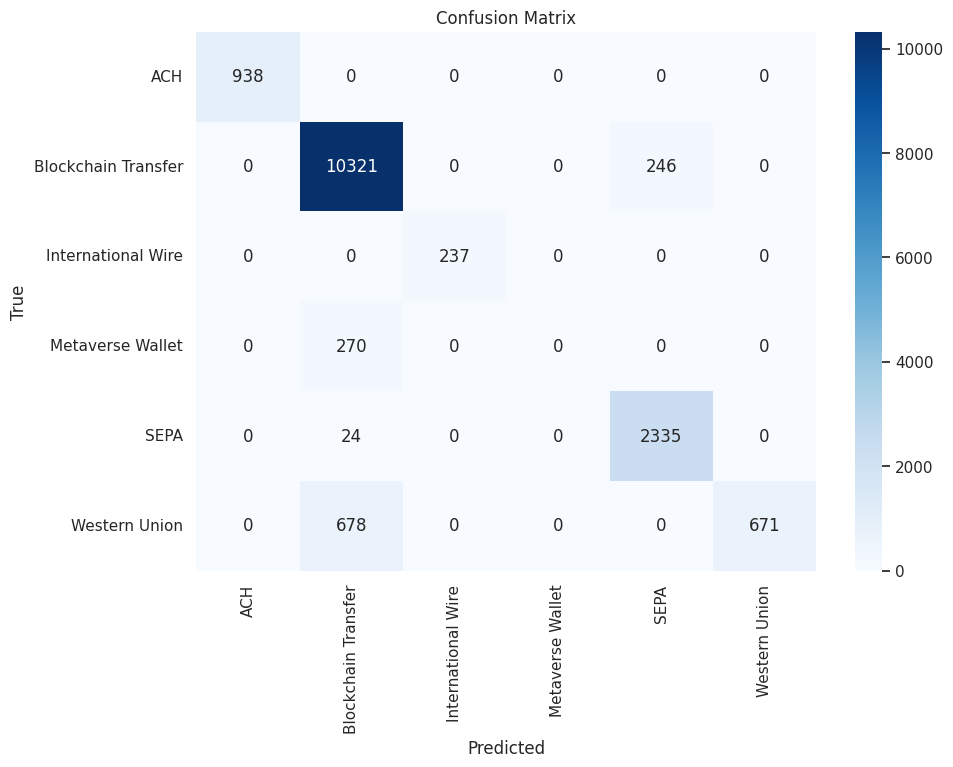

In [26]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=payment_option_mapping.values())


# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=payment_option_mapping.values(), yticklabels=payment_option_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier


# Initialize the model
gb = HistGradientBoostingClassifier(random_state=23)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.2, 0.3, 0.4, 0.5],
    'max_depth': [1, 2, 3, 4],
    "max_iter": [25, 50, 75]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 1, 'max_iter': 75}
Accuracy: 0.9997296437659032


Confusion Matrix:
 [[  938     0     0     0     0     0]
 [    0 10567     0     0     0     0]
 [    0     0   237     0     0     0]
 [    0     1     0   269     0     0]
 [    0     1     0     0  2358     0]
 [    0     0     0     0     0  1349]]
Classification Report:
                      precision    recall  f1-score   support

                ACH       1.00      1.00      1.00       938
Blockchain Transfer       1.00      1.00      1.00     10567
 International Wire       1.00      1.00      1.00       237
   Metaverse Wallet       1.00      1.00      1.00       270
               SEPA       1.00      1.00      1.00      2359
      Western Union       1.00      1.00      1.00      1349

           accuracy                           1.00     15720
          macro avg       1.00      1.00      1.00     15720
       weighted avg       1.00      1.00      1.00     15720



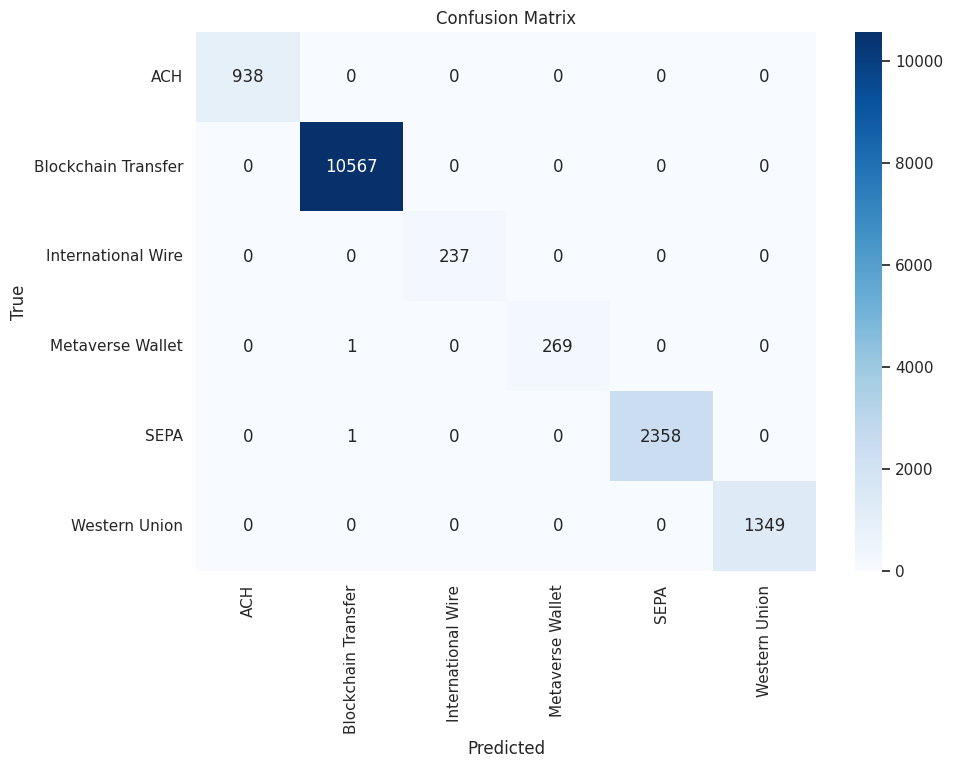

In [34]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=payment_option_mapping.values())


# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=payment_option_mapping.values(), yticklabels=payment_option_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Save the trained model to a .pkl file
with open('GBDT_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
